# Linear Regression from Scratch
### with Gradient Descent and Singular Value Decomposition (SVD)

#### by Markus Ullenbruch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, X, y):
        """ Linear Regression
        
        X -- Design Matrix/ Samples of Features, Samples in rows, Features columnwise
        y -- Target variable to predict
        """
        self.X = X
        self.y = y
        self.weights = None
    
    def fit(self, gradient_descent=True, tol=1e-4):
        """ Calculate Model Parameters
        
        gradient_descent=True -- Use Gradient Descent
        gradient_descent=False -- Use Singular Value Decomposition to solve Ax=b
        """
        if not gradient_descent:
            # Singular Value Decomposition (SVD) for solving X*theta = y
            U, S, Vt = np.linalg.svd(self.X, full_matrices=False)
            svd_pseudoinverse = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T
            self.weights = svd_pseudoinverse @ self.y
        else:
            # Gradient Descent --TO IMPLEMENT--
            pass
        
        mse_loss, mae_loss = self.evaluate(self.X, self.y)
        print('Training Results:\nMSE Loss:', mse_loss, '\nMAE Loss:', mae_loss)
        print('Weight Parameter:\n', self.weights)
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def evaluate(self, X, y):
        pred = np.dot(X, self.weights)
        error = pred-y
        mse_loss = np.mean((error)**2)
        mae_loss = np.mean(np.abs(error))
        return mse_loss, mae_loss

In [3]:
def add_constant(X):
    """Adding column of Ones to Data Matrix"""
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    return X

In [4]:
x = np.linspace(0, 100)
y = x + np.random.normal(0, 10, x.shape)
y = np.expand_dims(y, axis=1)
x = np.expand_dims(x, axis=1)
print(x.shape, y.shape)

(50, 1) (50, 1)


Training Results:
MSE Loss: 86.21869269071935 
MAE Loss: 7.604193737808555
Weight Parameter:
 [[1.95317844]
 [0.9518372 ]]


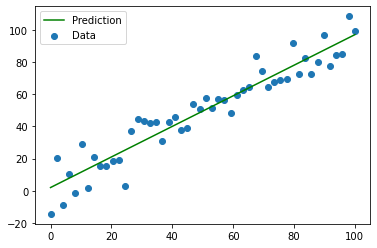

In [5]:
X_batch = add_constant(x) # adding constant

model = LinearRegression(X_batch, y)
model.fit(gradient_descent=False)
pred = model.predict(X_batch)

plt.scatter(x, y, label='Data')
plt.plot(x, pred, c='g', label='Prediction')
plt.legend()
plt.show()